<a href="https://colab.research.google.com/github/tarupathak30/Deep-Learning-/blob/main/batch_vs_stochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import time

In [19]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


{'Social_Network_Ads (1).csv': b'Age,EstimatedSalary,Purchased\r\n19,19000,0\r\n35,20000,0\r\n26,43000,0\r\n27,57000,0\r\n19,76000,0\r\n27,58000,0\r\n27,84000,0\r\n32,150000,1\r\n25,33000,0\r\n35,65000,0\r\n26,80000,0\r\n26,52000,0\r\n20,86000,0\r\n32,18000,0\r\n18,82000,0\r\n29,80000,0\r\n47,25000,1\r\n45,26000,1\r\n46,28000,1\r\n48,29000,1\r\n45,22000,1\r\n47,49000,1\r\n48,41000,1\r\n45,22000,1\r\n46,23000,1\r\n47,20000,1\r\n49,28000,1\r\n47,30000,1\r\n29,43000,0\r\n31,18000,0\r\n31,74000,0\r\n27,137000,1\r\n21,16000,0\r\n28,44000,0\r\n27,90000,0\r\n35,27000,0\r\n33,28000,0\r\n30,49000,0\r\n26,72000,0\r\n27,31000,0\r\n27,17000,0\r\n33,51000,0\r\n35,108000,0\r\n30,15000,0\r\n28,84000,0\r\n23,20000,0\r\n25,79000,0\r\n27,54000,0\r\n30,135000,1\r\n31,89000,0\r\n24,32000,0\r\n18,44000,0\r\n29,83000,0\r\n35,23000,0\r\n27,58000,0\r\n24,55000,0\r\n23,48000,0\r\n28,79000,0\r\n22,18000,0\r\n32,117000,0\r\n27,20000,0\r\n25,87000,0\r\n23,66000,0\r\n32,120000,1\r\n59,83000,0\r\n24,58000,0\r\n24,1

In [20]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [21]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [23]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [25]:
x_scaled.shape

(400, 2)

In [26]:
import tensorflow
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense

In [27]:
model = Sequential([
    Input(shape=(2, )),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(x_scaled, y, epochs=500, batch_size=1, validation_split=0.2)
print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5906 - loss: 0.6534 - val_accuracy: 0.9000 - val_loss: 0.5528
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8844 - loss: 0.4337 - val_accuracy: 0.8000 - val_loss: 0.4871
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8695 - loss: 0.3071 - val_accuracy: 0.8375 - val_loss: 0.4058
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8348 - loss: 0.3259 - val_accuracy: 0.8750 - val_loss: 0.3506
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.2452 - val_accuracy: 0.9125 - val_loss: 0.3110
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8283 - loss: 0.3135 - val_accuracy: 0.9250 - val_loss: 0.2766
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8464 - loss: 0.3105 - val_accuracy: 0.9250 - val_loss: 0.2676
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8857 - loss: 0.2428 - val_accu

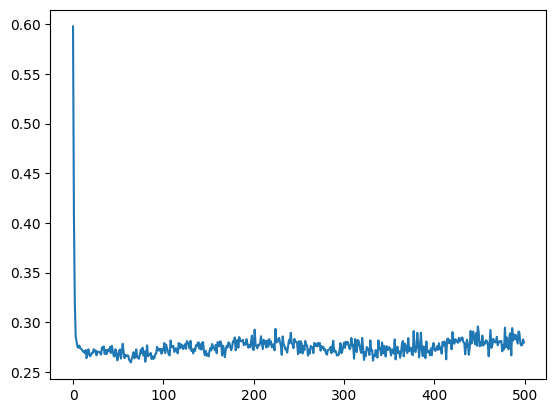

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [31]:
model = Sequential([
    Input(shape=(2, )),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(x_scaled, y, epochs=10, batch_size=250, validation_split=0.2)
print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.6748 - loss: 0.6770 - val_accuracy: 0.5250 - val_loss: 0.7111
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7810 - loss: 0.6605 - val_accuracy: 0.5750 - val_loss: 0.7073
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8042 - loss: 0.6478 - val_accuracy: 0.5875 - val_loss: 0.7006
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8322 - loss: 0.6392 - val_accuracy: 0.6000 - val_loss: 0.6979
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8379 - loss: 0.6326 - val_accuracy: 0.5875 - val_loss: 0.6940
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8507 - loss: 0.6240 - val_accuracy: 0.5875 - val_loss: 0.6906
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8472 - loss: 0.6161 - val_accuracy: 0.5875 - val_loss: 0.6863
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8465 - loss: 0.6102 - val_accuracy: 0.5875 - val_loss: 0.

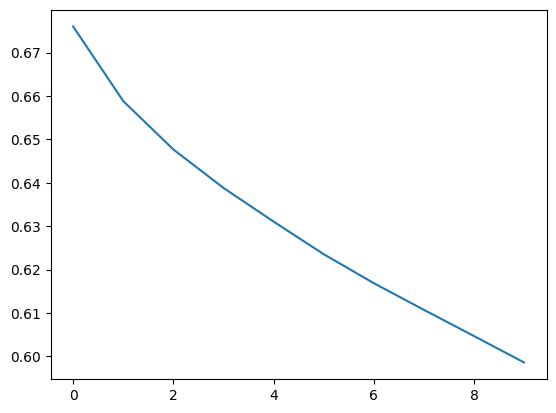

In [33]:
plt.plot(history.history['loss'])